# Project: Brazilian Medical Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<div style="text-align: justify">The dataset to analyze is information about medical appointmens in Brazil. The data is up to 100,000 input collected from several region in Brazil.</div>
<div style="text-align: justify"><br>There are several information included in the dataset. Basic data included are patient ID, appointment ID, age, and gender. Information consist of time when the patient scheduled their appointment, appointment date and location are included too. Patient information such as whether or not the patient is enrolled in Brasilian welfare program, whether the patient have diabetes or hipertension, have alcoholism, and handicapped or not are also included in the dataset. Last but not least, there is data about whether or not the patient went to see the doctor.</div>
<div style="text-align: justify"><br>In this analysis, we are trying find what is the important factor(s) correlated with patient absence.</div>

In [1]:
# Load libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


The dataset must be loaded and checked first prior analysis. Any irregulaties should be cleaned. Here below are step-by-step process to get there.

### General Properties

In [2]:
# Loading dataset
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
# df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<div style="text-align: justify">As we can see, several data need treatment. Patient ID and appointment ID have to be dropped because we do not need it. Time in scheduled day and appointment day is better separated in new column. After doing that, we must consider if those data make sense and convert it to correct format . Then, we need to change 'Yes' and 'No' in No-show column into '1' and '0' respectively so the data is easier to analyze. We also need to investigate handcap column because the column has max value of 4.</div>


### Dropping columns
As said earlier, patient ID and appointment ID columns need to be dropped.


In [5]:
# Dropping column
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Processing Time Information
We need to separate date and time so data can be viewed conviniently.

In [6]:
# Splitting date and time in separate column
df[['ScheduledDay', 'scheduled_time']] = df['ScheduledDay'].str.split("T",expand=True)
df[['AppointmentDay', 'appointment_time']] = df['AppointmentDay'].str.split("T",expand=True)

In [7]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_time,appointment_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08Z,00:00:00Z


In [8]:
# removing 'Z' letter in 'appointment_time' column data
df['scheduled_time'] = df['scheduled_time'].str.rstrip('Z')
df['appointment_time'] = df['appointment_time'].str.rstrip('Z')

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_time,appointment_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,00:00:00
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,00:00:00
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,00:00:00
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,00:00:00
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,00:00:00


It looks like data each row inside 'appointment_time' is only 00:00:00. Let's see about it.

In [10]:
# Finding number of unique in appointment_time column
df.appointment_time.nunique()

1

Data in appointment_time column makes no sense. Because of that, we cannot compare it with scheduled time. We need to delete those two columns then.

In [11]:
# Dropping 'appointment_time' and 'scheduled_time'
df.drop(['appointment_time', 'scheduled_time'], axis=1, inplace=True)

In [12]:
# Converting to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### Processing Attendance Data
We can do it by converting 'Yes' to '1' and 'No' to '0'.

In [13]:
# Finding unique values
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Converting 'Yes' to '1' and 'No' to '0'
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [15]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


### Processing Handicap Status Data
We should find why it has maximum of 4.

In [16]:
# Finding value count of handicap status data
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

There is value other than 0 and 1. These values can be dropped because it do not make any sense.

In [17]:
# Dropping values other than '1' and '0'
df_drop = df.query('Handcap > 1')
df.drop(df_drop.index, inplace=True)

### Processing Age Data
As we can see in descriptive statistic above, there is patient with age below zero.

In [18]:
# Finding age below zero
age_drop = df.query('Age <0')
age_drop

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


In [19]:
# Dropping age below zero
df.drop(age_drop.index, inplace=True)

### Renaming Columns Label
To make dataset easier to process, we need to rename it.

In [20]:
# Make all string into lowercase
column = df.columns
column = column.str.lower()
df.columns = column
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [21]:
# Renaming columns
df.rename(columns={'scheduledday' : 'scheduled_day', 'appointmentday' : 'appointment_day', 'no-show' : 'no_show'}, inplace=True)

### Processed Data
Data that has been cleaned and trimmed.

In [22]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### General Information

In [23]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.201927
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From statistic above, we can extract these information:
>1. Patient mean age is 37 years.
>2. Patient who is attending their appointment is about 80%.

We can add additional information by plotting histogram for each column.

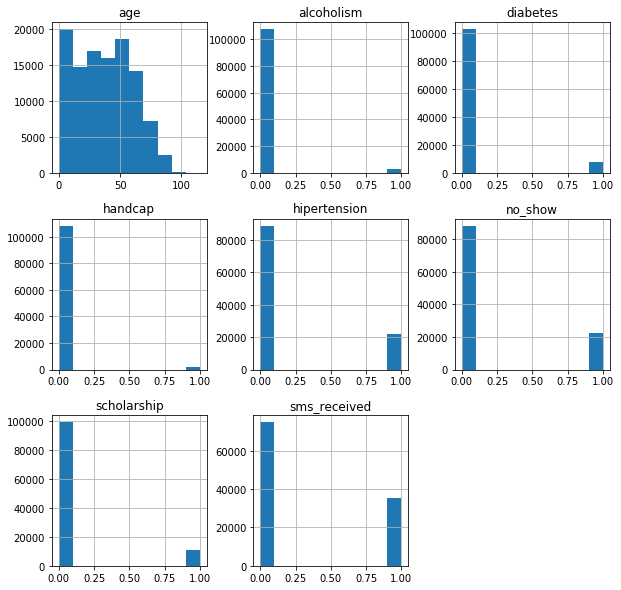

In [24]:
df.hist(figsize=(10,10));

<div style="text-align: justify">Histogram above gives us some information. Age data distribution is skewed right which means the hospital has more younger patient than older. The hospital has more patient with hipertension than patient with alcoholism and diabetes.The least patient the hospital has is handicapped patient.</div>

We will try to find other meaningfull data below.

### Number of Attending Patient by Gender

Which one has higher attendance, female patient or male patient?

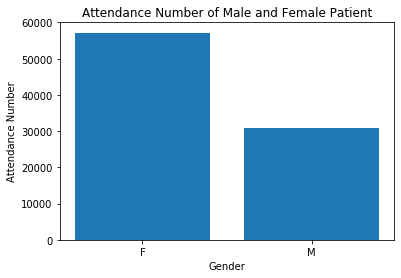

In [25]:
# Finding attendance number
patient_show = df.query('no_show == 0')['gender'].value_counts()

ind = np.arange(len(patient_show))

# Plotting data above
plt.bar(ind, patient_show.sort_index())
plt.xticks(ind, patient_show.sort_index().index)
plt.xlabel('Gender')
plt.ylabel('Attendance Number')
plt.title('Attendance Number of Male and Female Patient');

Female patient has higher attendance number than male patient as we can see from bar chart above. Let's see the proprotion of it.

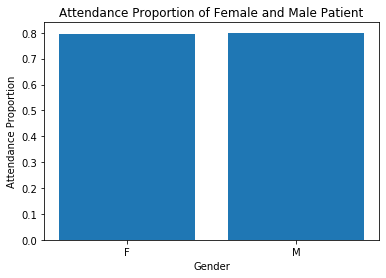

In [26]:
# Finding proportion of attendance
patient_prop = df.query('no_show == 0')['gender'].value_counts() / df['gender'].value_counts()

ind = np.arange(len(patient_prop))

# Plotting data above
plt.bar(ind, patient_prop.sort_index())
plt.xticks(ind, patient_prop.sort_index().index)
plt.title('Attendance Proportion of Female and Male Patient')
plt.xlabel('Gender')
plt.ylabel('Attendance Proportion');

Well, their proportion is almost the same and the value is reflected in attendance mean value.

### Number of Attending Patient by Age
Now, how about to plot attendance number by age.

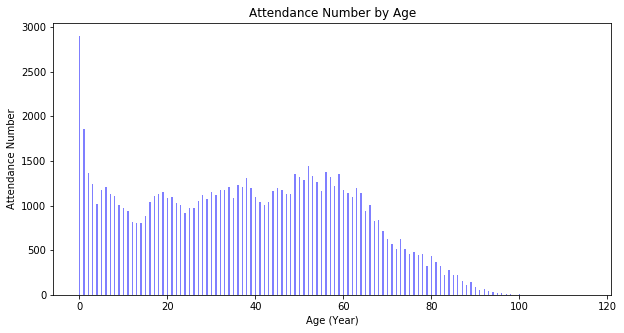

In [27]:
# Attending patient's age and gender
age_show= df.query('no_show == 0')['age'].value_counts()

ind = age_show.index
width = 0.3

# Plotting number of attending patient by age
plt.subplots(figsize=(10,5))
plt.bar(ind, age_show, width, color = 'b', alpha=0.5)
plt.xlabel('Age (Year)')
plt.ylabel('Attendance Number')
plt.title('Attendance Number by Age');

Bar chart above is too dense to read. It is better to group patient age so we can see less dense bar chart.

In [28]:
# Grouping patient age by 10
bin_edges = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
bin_names = ['0-10 year', '11-20 year', '21-30 year', '31-40 year', '41-50 year', '51-60 year', '61-70 year', '71-80 year', '81-90 year', '91-100 year', '101-110 year', '111-120 year' ]
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,61-70 year


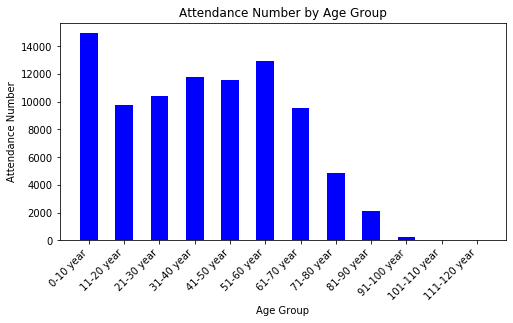

In [29]:
# Attending patient's age(grouped)
age_show = df.query('no_show == 0')['age_group'].value_counts()

ind = np.arange(len(age_show))

width1 = 0.5

plt.subplots(figsize=(8,4))
plt.bar(ind, age_show.sort_index(ascending=True), width1, color='b')
plt.xticks(ind, age_show.sort_index(ascending=True).index, rotation = 45, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Attendance Number')
plt.title('Attendance Number by Age Group');

<div style="text-align: justify">Patient in age group 0-10 year and 50-60 year has more attendance number than other group. Attendance number is increasing from 11-20 year group above and then decreasing after 50-60 year age group.</div>
<br><div style="text-align: justify">Chart above is better if we see the proportion of it because there is some patient in age group 101-110 year and 111-120 year but not showing. Let's view attendance proportion below.</div>

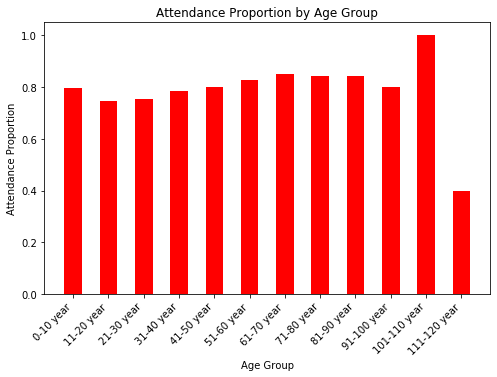

In [30]:
# Proportion of attendance by age(grouped)
prop_age_show = df.query('no_show == 0')['age_group'].value_counts() / df['age_group'].value_counts()

# Plotting data above
plt.subplots(figsize=(8,5))
plt.bar(ind, prop_age_show.sort_index(ascending=True), width1, color='r')
plt.xticks(ind, prop_age_show.sort_index(ascending=True).index, rotation = 45, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Attendance Proportion')
plt.title('Attendance Proportion by Age Group');

<div style="text-align: justify">In these chart, we can see that there is patient in age group mentioned above. Attendance proportion is higher for age group 0-10 year than 11-20 year. Then, the attendance proportion of patient is increasing from 11 to 110 year.</div>

### Finding Attendance from SMS
<div style="text-align: justify">Some patient received SMS reminding them about their appointment. To find whether the SMS is effective or not, we need to analyse data in sms_received column.</div>

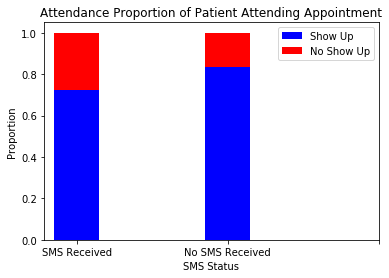

In [31]:
# Calculating total attending people by sms and attending with no sms
total_sms = len(df.iloc[:,[10,11]].query('sms_received ==1'))
total_nosms = len(df.iloc[:,[10,11]].query('sms_received ==0'))

# Calculating proportion attending people by sms and attending with no sms
c_sms = len(df.iloc[:,[10,11]].query('no_show == 0 & sms_received ==1'))/total_sms
c_no_sms = len(df.iloc[:,[10,11]].query('no_show == 0 & sms_received ==0'))/total_nosms
nc_sms = len(df.iloc[:,[10,11]].query('no_show == 1 & sms_received ==1'))/total_sms
nc_no_sms = len(df.iloc[:,[10,11]].query('no_show == 1 & sms_received ==0'))/total_nosms

label = ['SMS Received', 'No SMS Received', '']
width = 0.3

# Plotting data above
# plt.subplots(figsize=(5,5))
plt.bar(1, c_sms, width, color = 'b', label = 'Show Up')
plt.bar(1, nc_sms, width, bottom = c_sms, color = 'r', label = 'No Show Up')
plt.bar(2, c_no_sms, width, color = 'b')
plt.bar(2, nc_no_sms, width, bottom = c_no_sms, color = 'r')
plt.xticks([1, 2, 3],label)
plt.ylabel('Proportion')
plt.title('Attendance Proportion of Patient Attending Appointment')
plt.xlabel('SMS Status')
plt.legend(loc='upper right');

It looks like that sending SMS is not effective. Attendance proportion of patient who received SMS is lower than the patient with no SMS.

### Finding Attendance by Neighbourhood
We should see whether doctor location affecting patient willingness to come.

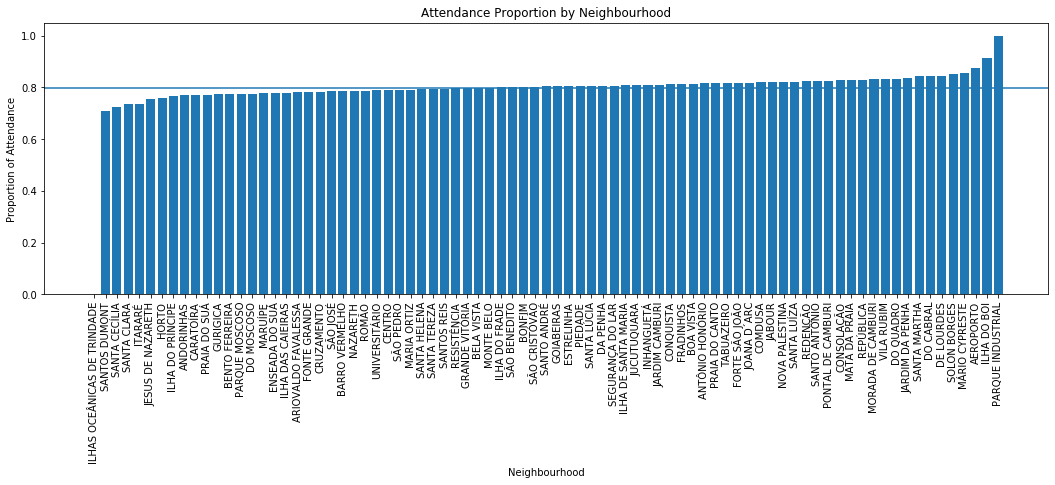

In [32]:
# Finding attendance mean value for each neighbourhood
neighbourhood = 1 - df.groupby('neighbourhood')['no_show'].mean().sort_values(ascending=False)
show_mean = 1 - df['no_show'].mean()

# Plotting data above
plt.subplots(figsize=(18,5))
plt.axhline(y = show_mean)
plt.bar(neighbourhood.index, neighbourhood)
plt.xticks(rotation = 90, ha='center')
plt.xlabel('Neighbourhood')
plt.ylabel('Proportion of Attendance')
plt.title('Attendance Proportion by Neighbourhood');

As we can see, some neighbourhood have lower attendance proportion. Here below are neighbourhood with attendance proportion below mean.

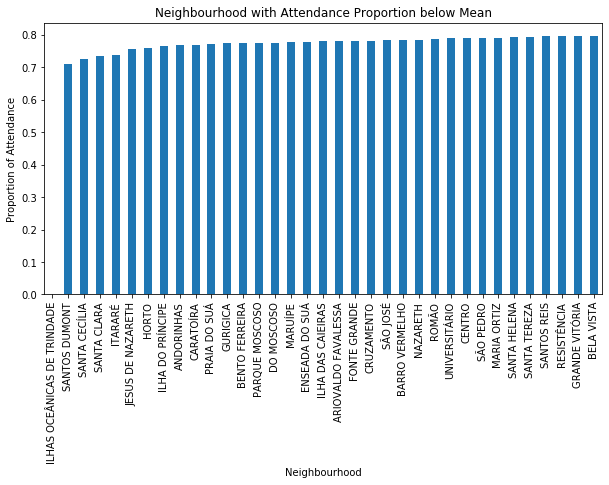

In [33]:
fig, ax = plt.subplots()
neighbourhood[neighbourhood < show_mean].plot(kind='bar', width=0.5, figsize=(10,5))
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Proportion of Attendance')
ax.set_title('Neighbourhood with Attendance Proportion below Mean');

### Finding Attendance possibility with Waiting Time
Is there any difference in waiting time between patient who show up and patient who do not?

In [34]:
# Add waiting time to dataset
df['day_delta'] = df['appointment_day'] - df['scheduled_day']

In [35]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group,day_delta
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,61-70 year,0 days


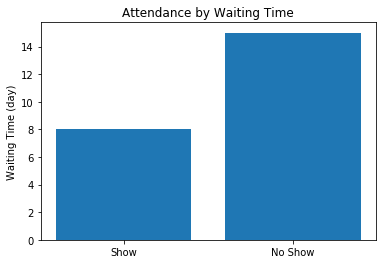

In [36]:
# Finding waiting time between patient who show up and don't
day_show = df.query('no_show == 0')['day_delta'].mean()
day_no_show = df.query('no_show == 1')['day_delta'].mean()

to_plot = [day_show.days, day_no_show.days]
label = ['Show', 'No Show']

# Plotting data above
plt.bar([1, 2], to_plot)
plt.xticks([1, 2], label)
plt.title('Attendance by Waiting Time')
plt.ylabel('Waiting Time (day)');

<div style="text-align: justify">There is difference in delay time between people who attend their appointment and patient who do not attend. The mean delay time for attending patient is 8 days while it is 15 days for patient who do not attend.</div>

### Other Finding
<div style="text-align: justify">In General Information above, we can see that attendance number of patient with hipertension is higher than patient with alcoholism, diabetes, and handicapped patient. Here, I want to know attendance proportion of patient with those status, patient who get scholarship, and also patient without those status and no scholarship.</div>

First, I will show the attendance number and then the proportion of it.

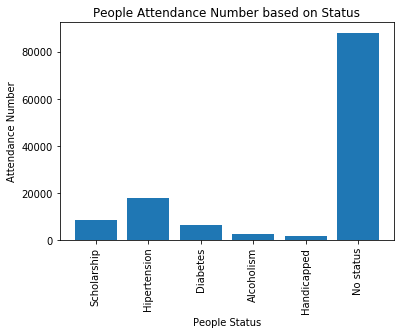

In [37]:
# Finding number of attendance
scholar = len(df.query('scholarship == 1 & no_show == 0'))
hiper = len(df.query('hipertension == 1 & no_show == 0'))
diabet = len(df.query('diabetes == 1 & no_show == 0'))
alcohol = len(df.query('alcoholism == 1 & no_show == 0'))
handcap = len(df.query('handcap == 1 & no_show == 0'))
no_status = len(df.query('(scholarship == 0 | hipertension == 0 | diabetes == 0 | alcoholism == 0 | handcap == 0) & no_show == 0'))

to_plot = [scholar, hiper, diabet, alcohol, handcap, no_status]
label = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicapped', 'No status']
ind = np.arange(len(to_plot))

# Plotting data above
plt.bar(ind, to_plot)
plt.xticks(ind, label, rotation = 90)
plt.title('People Attendance Number based on Status')
plt.xlabel('People Status')
plt.ylabel('Attendance Number');

Well, patient with no status at all outnumbered other patient. How about if we see the proportion of it.

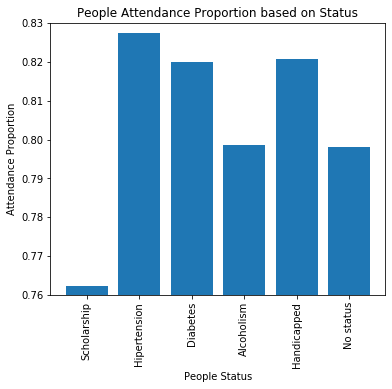

In [38]:
# Finding proportion of attendance
scholar = len(df.query('scholarship == 1 & no_show == 0')) / len(df.query('scholarship == 1'))
hiper = len(df.query('hipertension == 1 & no_show == 0')) / len(df.query('hipertension == 1'))
diabet = len(df.query('diabetes == 1 & no_show == 0')) / len(df.query('diabetes == 1'))
alcohol = len(df.query('alcoholism == 1 & no_show == 0')) / len(df.query('alcoholism == 1'))
handcap = len(df.query('handcap == 1 & no_show == 0')) / len(df.query('handcap == 1'))
no_status = len(df.query('(scholarship == 0 | hipertension == 0 | diabetes == 0 | alcoholism == 0 | handcap == 0) & no_show == 0')) / len(df.query('scholarship == 0 | hipertension == 0 | diabetes == 0 | alcoholism == 0 | handcap == 0'))

to_plot = [scholar, hiper, diabet, alcohol, handcap, no_status]
label = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicapped', 'No status']
ind = np.arange(len(to_plot))

# Plotting data above
plt.subplots(figsize=(6,5))
plt.bar(ind, to_plot)
plt.xticks(ind, label, rotation=90)
plt.title('People Attendance Proportion based on Status')
plt.xlabel('People Status')
plt.ylabel('Attendance Proportion')
plt.ylim(0.76,0.83);

As we can see, patient who get scholarship tends to miss their appointment while people with hipertension more likely to meet their doctor.

<a id='conclusions'></a>
## Conclusions

After doing analysis above, we can conclude that:
>1. Younger patient is more likely not going to see the doctor.<br>
2. People who getting SMS tends to miss their appointment.<br>
3. People in some neighbourhoods have attendance proportion below mean.<br>
4. People who wait for longer time is more likely to miss their meeting with doctor.<br>
5. People with scholarship tends to miss their appointment.

<div style="text-align: justify">I would like to inform that information above only show relation between one independent variable (e.g: Waiting time) and one dependent variable (e.g: Attendance Information). I do not apply any statistical test so information above could be less precise.</div>